In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from numpy.linalg import LinAlgError
from dateutil.parser import parse
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import math

In [280]:
df = pd.read_csv('C:/Users/Maha/Desktop/montcoalert/911.csv')
#df = df.reset_index(drop=True)
df.head(500)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [281]:
df_vehicle = df[df['title'].str.contains("Traffic")]

df_vehicle = df_vehicle.reset_index(drop=True)
df_vehicle

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1
1,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1
2,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1
3,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1
4,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1
5,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
6,40.223778,-75.235399,STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...,18936.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:31:00,MONTGOMERY,STUMP RD & WITCHWOOD DR,1
7,40.209337,-75.135266,COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...,18974.0,Traffic: DISABLED VEHICLE -,2015-12-10 17:45:23,HORSHAM,COUNTY LINE RD & WILLOW DR,1
8,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:43:45,NORRISTOWN,PENN ST & ARCH ST,1
9,40.117948,-75.209848,CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...,19031.0,Traffic: DISABLED VEHICLE -,2015-12-10 17:53:22,WHITEMARSH,CHURCH RD & REDCOAT DR,1


In [282]:
del df_vehicle['lat']
del df_vehicle['zip']
del df_vehicle['lng']
del df_vehicle['title']
del df_vehicle['addr']
del df_vehicle['twp']

In [283]:
del df_vehicle['e']
del df_vehicle['desc']
df_vehicle[['date', 'time']] = df_vehicle['timeStamp'].str.split('\s+', expand=True)

In [284]:
df_vehicle.head(20)
df_vehicle['date'] = pd.to_datetime(df_vehicle['date'])
df_vehicle = df_vehicle.reset_index(drop=True)
del df_vehicle['timeStamp']
del df_vehicle['time']

In [285]:
df_freq = pd.DataFrame({'date':df_vehicle['date'].value_counts().index, 'freq':df_vehicle['date'].value_counts().values})

In [286]:
df_freq['freq'] = df_freq['freq'].astype(float)
df_freq.info()
df_freq

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
date    835 non-null datetime64[ns]
freq    835 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


,date,freq
0,2018-03-02,1328.0
1,2018-03-07,586.0
2,2016-01-23,531.0
3,2018-03-03,417.0
4,2017-12-15,408.0
5,2018-01-04,323.0
6,2016-01-12,319.0
7,2016-02-24,302.0
8,2017-12-09,283.0
9,2016-04-03,281.0


# Train / test split

In [287]:
n = df_freq.shape[0]
train_size = 0.8

df_freq = df_freq.sort_values('date')
train = df_freq.iloc[:int(n * train_size)]
test = df_freq.iloc[int(n * train_size):]
test

,date,freq
38,2017-10-09,216.0
426,2017-10-10,134.0
262,2017-10-11,150.0
387,2017-10-12,138.0
644,2017-10-13,109.0
640,2017-10-14,110.0
805,2017-10-15,70.0
267,2017-10-16,150.0
300,2017-10-17,147.0
327,2017-10-18,144.0


In [288]:
train.info()
test.info()
train_set = pd.Series(train['freq'].values , index=train['date'])
test_set = pd.Series(test['freq'].values , index=test['date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 832 to 834
Data columns (total 2 columns):
date    668 non-null datetime64[ns]
freq    668 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 38 to 807
Data columns (total 2 columns):
date    167 non-null datetime64[ns]
freq    167 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


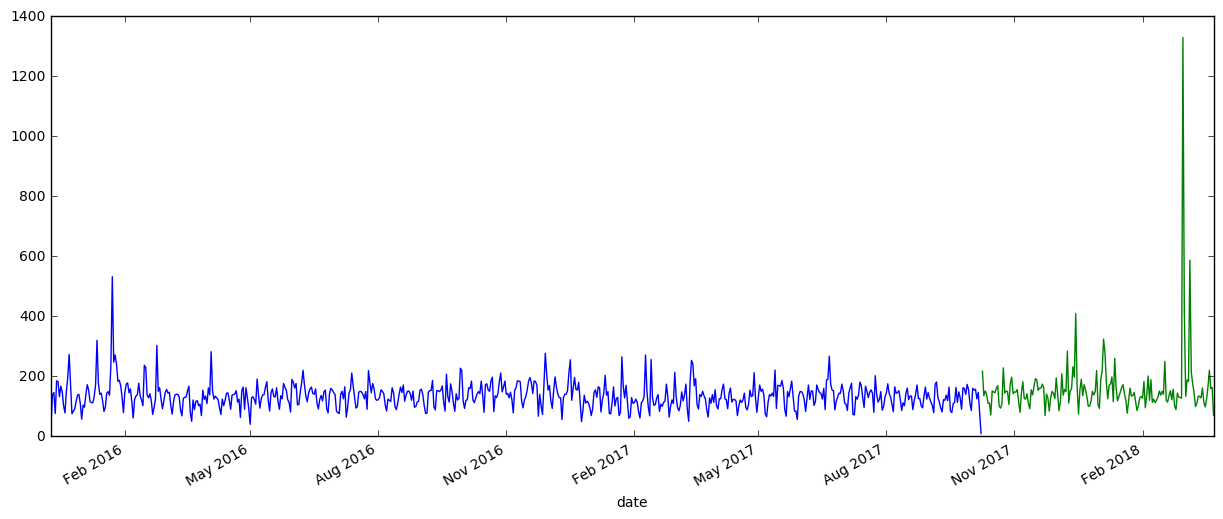

In [289]:
train_set.plot()
test_set.plot()

In [290]:
train_idx = pd.date_range('2015-12-10', '2017-10-08')
train_set= train_set.reindex(train_idx, fill_value=0)
upsampled_train = train_set.resample('D')
interpolated_train = upsampled_train.interpolate(method='linear')
interpolated_train

2015-12-10     41.0
2015-12-11    137.0
2015-12-12    145.0
2015-12-13     75.0
2015-12-14    184.0
2015-12-15    181.0
2015-12-16    131.0
2015-12-17    166.0
2015-12-18    148.0
2015-12-19    101.0
2015-12-20     77.0
2015-12-21    148.0
2015-12-22    196.0
2015-12-23    272.0
2015-12-24    176.0
2015-12-25     74.0
2015-12-26     83.0
2015-12-27     90.0
2015-12-28    115.0
2015-12-29    136.0
2015-12-30    139.0
2015-12-31    108.0
2016-01-01     56.0
2016-01-02    103.0
2016-01-03     96.0
2016-01-04    138.0
2016-01-05    171.0
2016-01-06    153.0
2016-01-07    115.0
2016-01-08    111.0
              ...  
2017-09-09     94.0
2017-09-10     80.0
2017-09-11    121.0
2017-09-12    119.0
2017-09-13    136.0
2017-09-14    118.0
2017-09-15    163.0
2017-09-16     83.0
2017-09-17     78.0
2017-09-18    108.0
2017-09-19    112.0
2017-09-20    162.0
2017-09-21    112.0
2017-09-22    147.0
2017-09-23    127.0
2017-09-24     89.0
2017-09-25    161.0
2017-09-26    158.0
2017-09-27    139.0


In [291]:
test_idx = pd.date_range('2017-10-09', '2018-03-24')
test_set= test_set.reindex(test_idx, fill_value=0)
upsampled_test = test_set.resample('D')
interpolated_test = upsampled_test.interpolate(method='linear')
interpolated_test

2017-10-09     216.0
2017-10-10     134.0
2017-10-11     150.0
2017-10-12     138.0
2017-10-13     109.0
2017-10-14     110.0
2017-10-15      70.0
2017-10-16     150.0
2017-10-17     147.0
2017-10-18     144.0
2017-10-19     159.0
2017-10-20     168.0
2017-10-21     100.0
2017-10-22      93.0
2017-10-23     107.0
2017-10-24     227.0
2017-10-25     143.0
2017-10-26     150.0
2017-10-27     148.0
2017-10-28     105.0
2017-10-29     175.0
2017-10-30     196.0
2017-10-31     141.0
2017-11-01     147.0
2017-11-02     146.0
2017-11-03     155.0
2017-11-04     114.0
2017-11-05      79.0
2017-11-06     145.0
2017-11-07     181.0
               ...  
2018-02-23     156.0
2018-02-24     100.0
2018-02-25      88.0
2018-02-26     143.0
2018-02-27     130.0
2018-02-28     128.0
2018-03-01     126.0
2018-03-02    1328.0
2018-03-03     417.0
2018-03-04     132.0
2018-03-05     187.0
2018-03-06     182.0
2018-03-07     586.0
2018-03-08     213.0
2018-03-09     174.0
2018-03-10     145.0
2018-03-11   

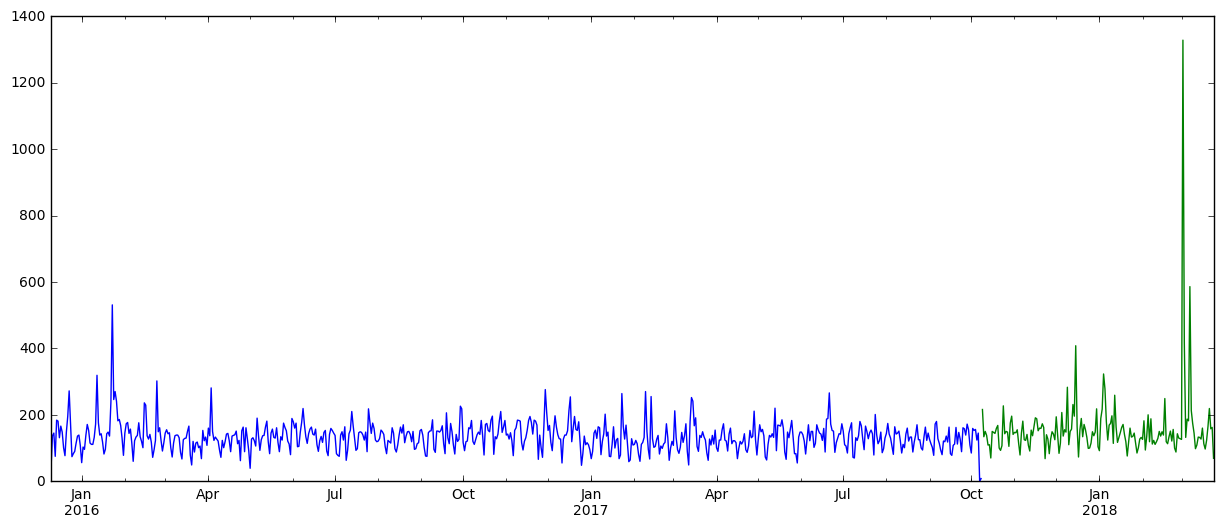

In [292]:
interpolated_train.plot()
interpolated_test.plot()

In [293]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(5).mean()
    rolstd = timeseries.rolling(5).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

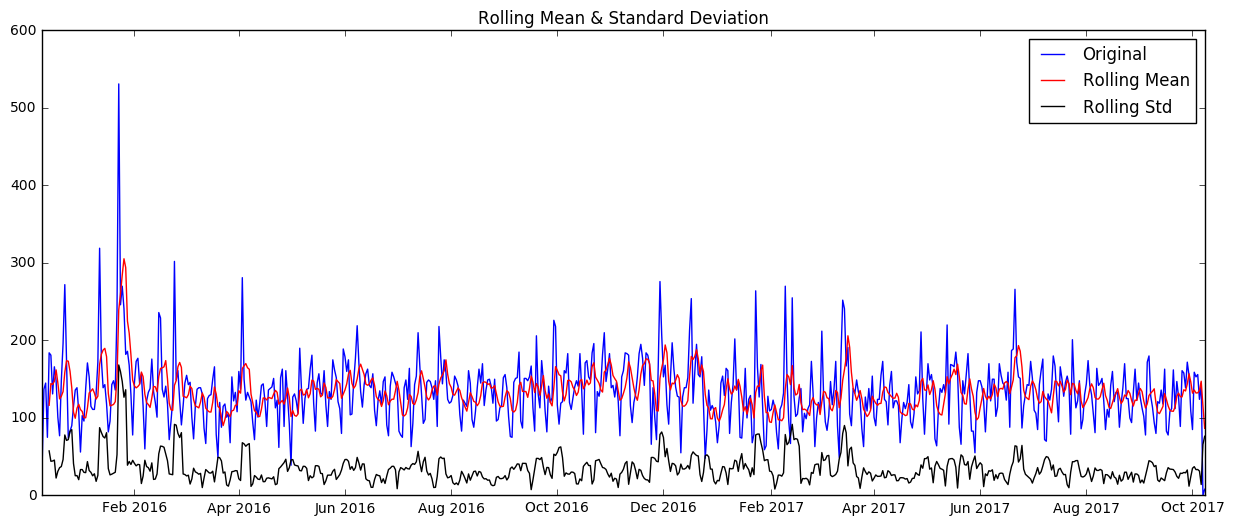

Results of Dickey-Fuller Test:
Test Statistic                  -3.754200
p-value                          0.003412
#Lags Used                      20.000000
Number of Observations Used    648.000000
Critical Value (5%)             -2.866011
Critical Value (10%)            -2.569151
Critical Value (1%)             -3.440482
dtype: float64


In [294]:
test_stationarity(interpolated_train)

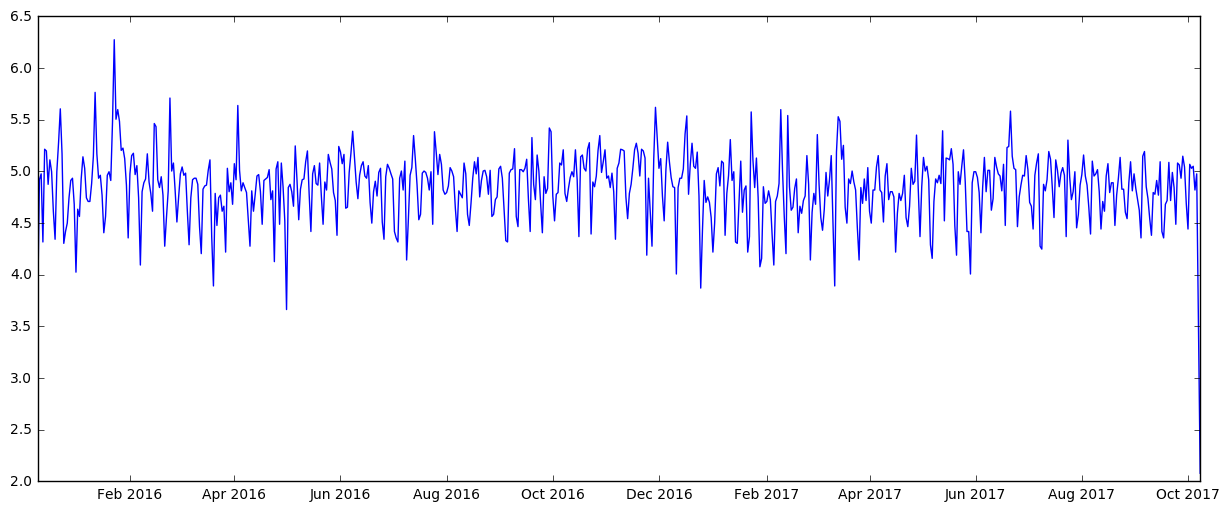

In [295]:
interpolated_log = np.log(interpolated_train)
interpolated_log_set = interpolated_log.replace([np.inf, -np.inf], np.nan).dropna(how="all")
plt.plot(interpolated_log_set)

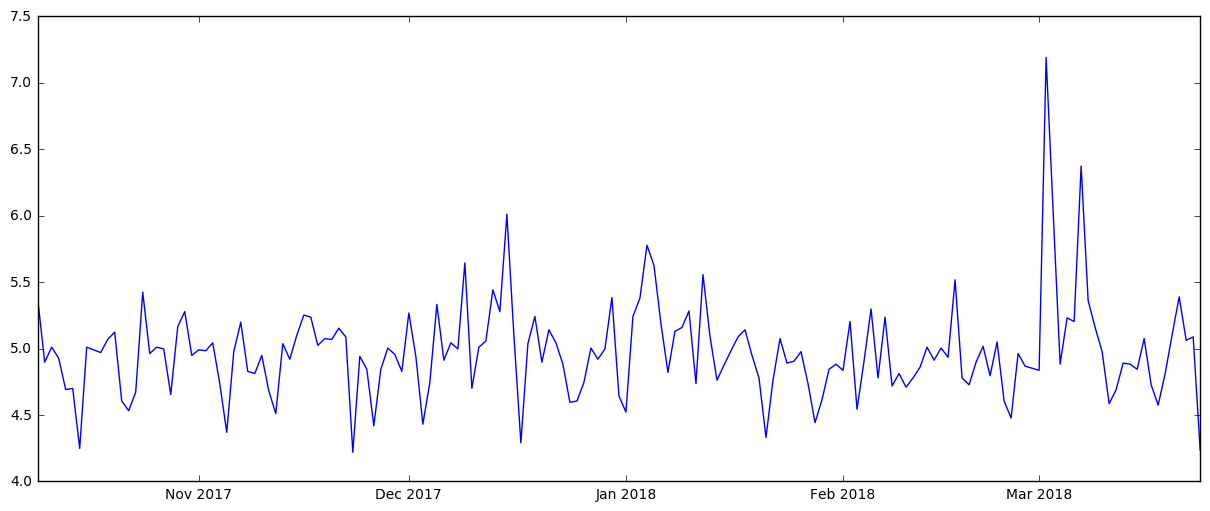

In [296]:
interpolated_log_test = np.log(interpolated_test)
interpolated_log_set_test = interpolated_log_test.replace([np.inf, -np.inf], np.nan).dropna(how="all")
plt.plot(interpolated_log_set_test)
interpolated_log_diff_test = interpolated_log_set_test - interpolated_log_set_test.shift()
interpolated_log_diff_set_test = interpolated_log_diff_test.replace([np.inf, -np.inf], np.nan).dropna(how="all")

In [297]:
interpolated_log_diff = interpolated_log_set - interpolated_log_set.shift()
interpolated_log_diff_set = interpolated_log_diff.replace([np.inf, -np.inf], np.nan).dropna(how="all")

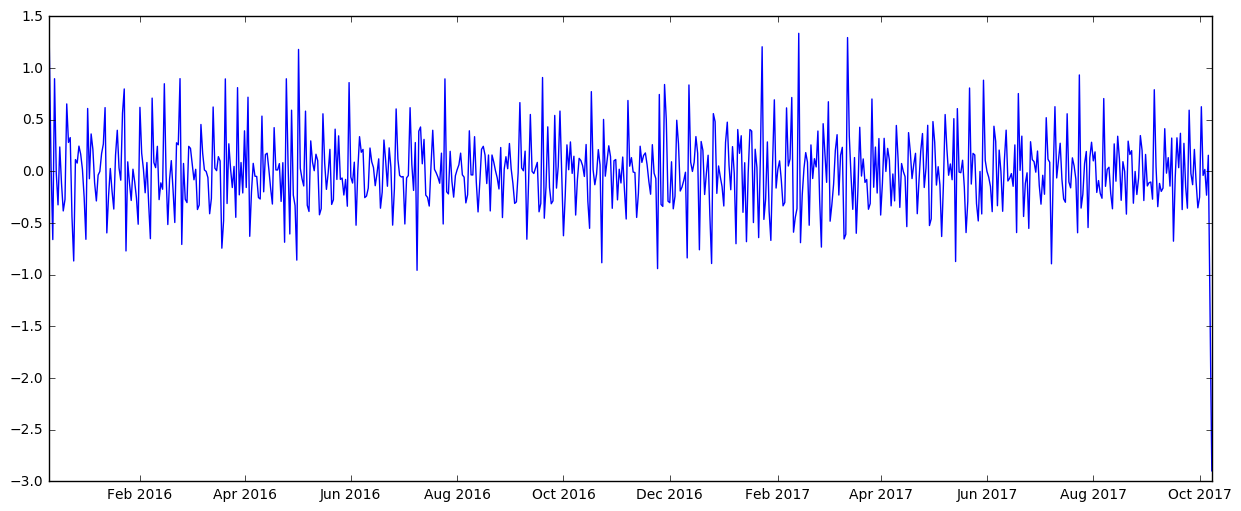

In [298]:
plt.plot(interpolated_log_diff_set)

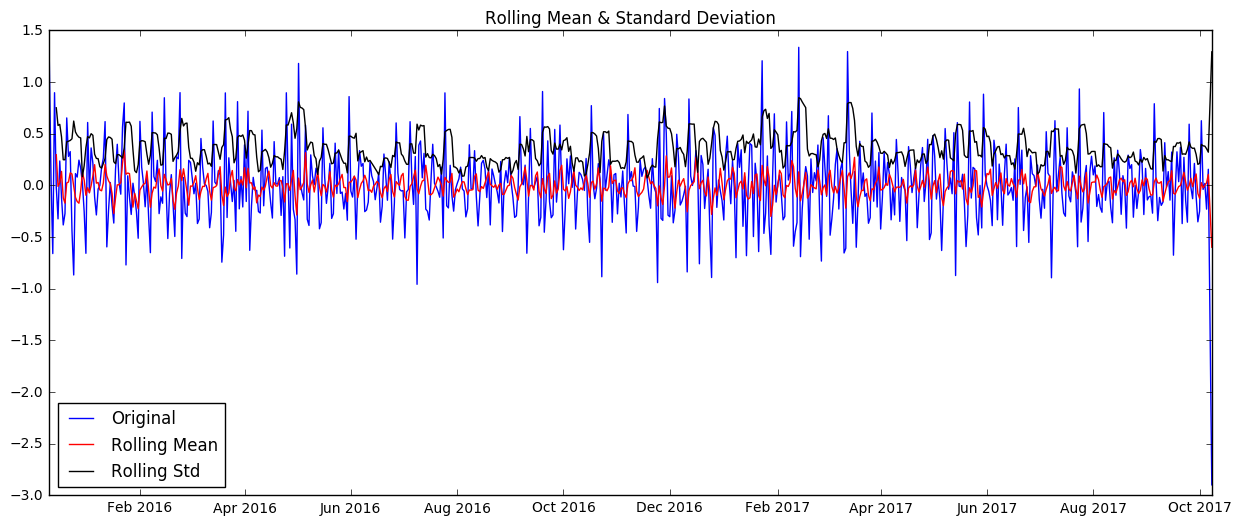

Results of Dickey-Fuller Test:
Test Statistic                -1.138191e+01
p-value                        8.470456e-21
#Lags Used                     1.900000e+01
Number of Observations Used    6.470000e+02
Critical Value (5%)           -2.866017e+00
Critical Value (10%)          -2.569154e+00
Critical Value (1%)           -3.440498e+00
dtype: float64


In [299]:
test_stationarity(interpolated_log_diff_set)

# ACF and PACF plots

In [300]:
from statsmodels.tsa.stattools import acf, pacf

In [301]:
lag_acf = acf(interpolated_log_diff_set, nlags=20)
lag_pacf = pacf(interpolated_log_diff_set, nlags=20, method='ols')

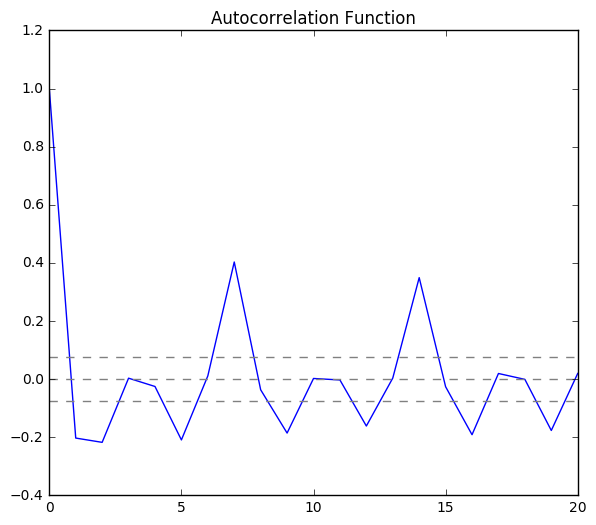

In [302]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(interpolated_log_diff_set)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(interpolated_log_diff_set)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:

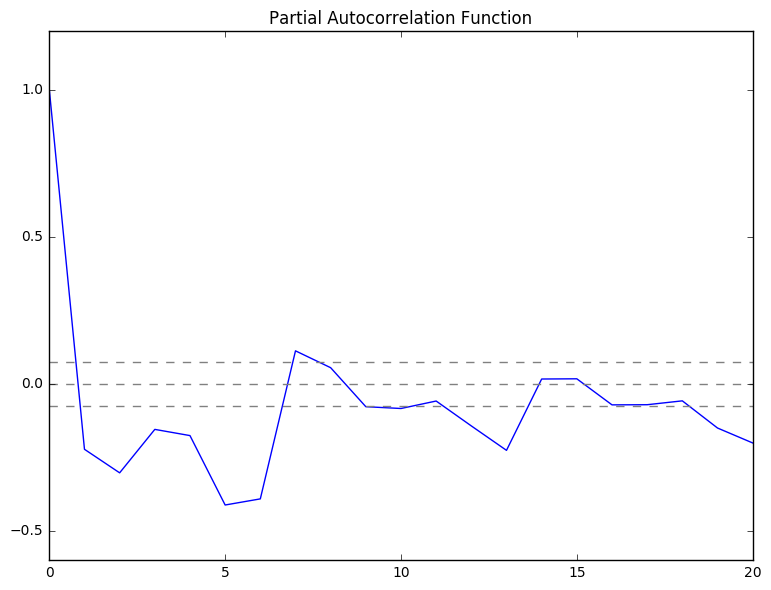

In [303]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(interpolated_log_diff_set)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(interpolated_log_diff_set)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# AR Model

In [304]:
from statsmodels.tsa.arima_model import ARIMA

In [305]:
model = ARIMA(interpolated_log_set, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
interpolated_log_set

2015-12-10    3.713572
2015-12-11    4.919981
2015-12-12    4.976734
2015-12-13    4.317488
2015-12-14    5.214936
2015-12-15    5.198497
2015-12-16    4.875197
2015-12-17    5.111988
2015-12-18    4.997212
2015-12-19    4.615121
2015-12-20    4.343805
2015-12-21    4.997212
2015-12-22    5.278115
2015-12-23    5.605802
2015-12-24    5.170484
2015-12-25    4.304065
2015-12-26    4.418841
2015-12-27    4.499810
2015-12-28    4.744932
2015-12-29    4.912655
2015-12-30    4.934474
2015-12-31    4.682131
2016-01-01    4.025352
2016-01-02    4.634729
2016-01-03    4.564348
2016-01-04    4.927254
2016-01-05    5.141664
2016-01-06    5.030438
2016-01-07    4.744932
2016-01-08    4.709530
                ...   
2017-09-08    4.736198
2017-09-09    4.543295
2017-09-10    4.382027
2017-09-11    4.795791
2017-09-12    4.779123
2017-09-13    4.912655
2017-09-14    4.770685
2017-09-15    5.093750
2017-09-16    4.418841
2017-09-17    4.356709
2017-09-18    4.682131
2017-09-19    4.718499
2017-09-20 

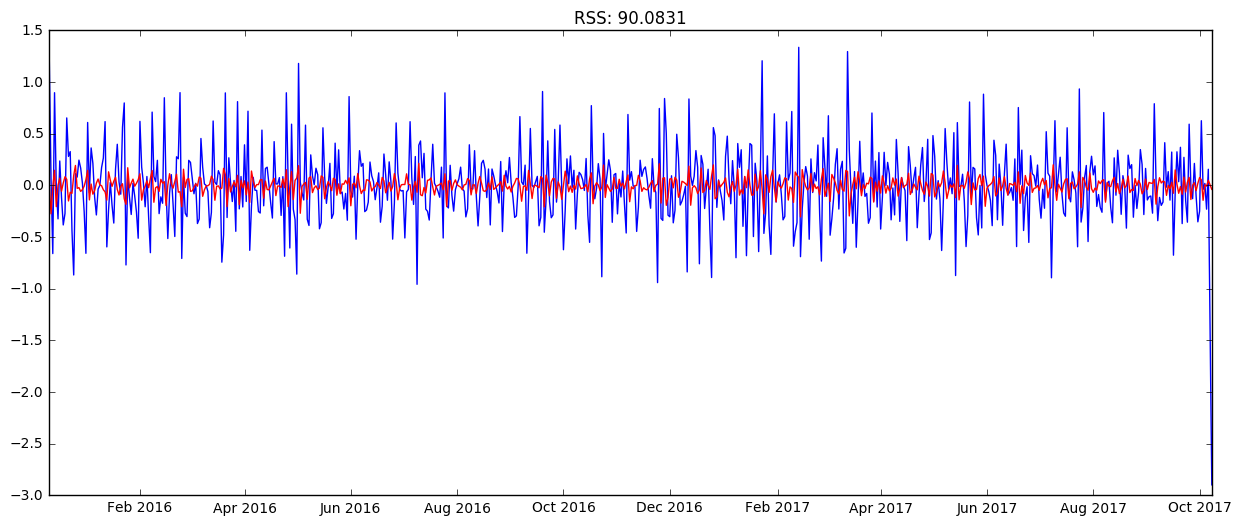

In [306]:
plt.plot(interpolated_log_diff_set)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-interpolated_log_diff_set)**2))

# MA Model

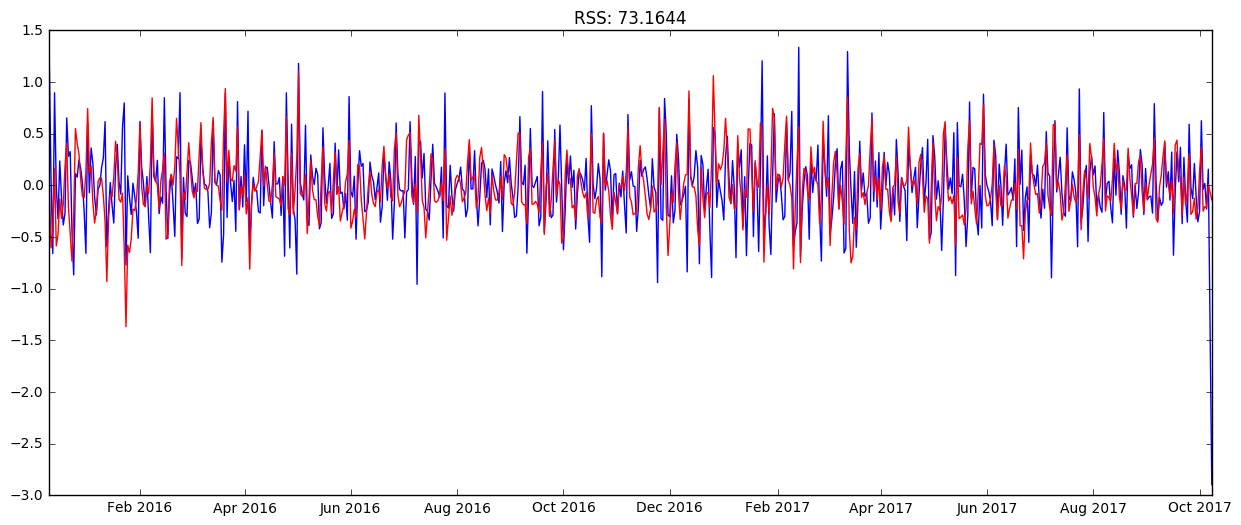

In [307]:
model = ARIMA(interpolated_log_set, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(interpolated_log_diff_set)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-interpolated_log_diff_set)**2))

# Combined Model

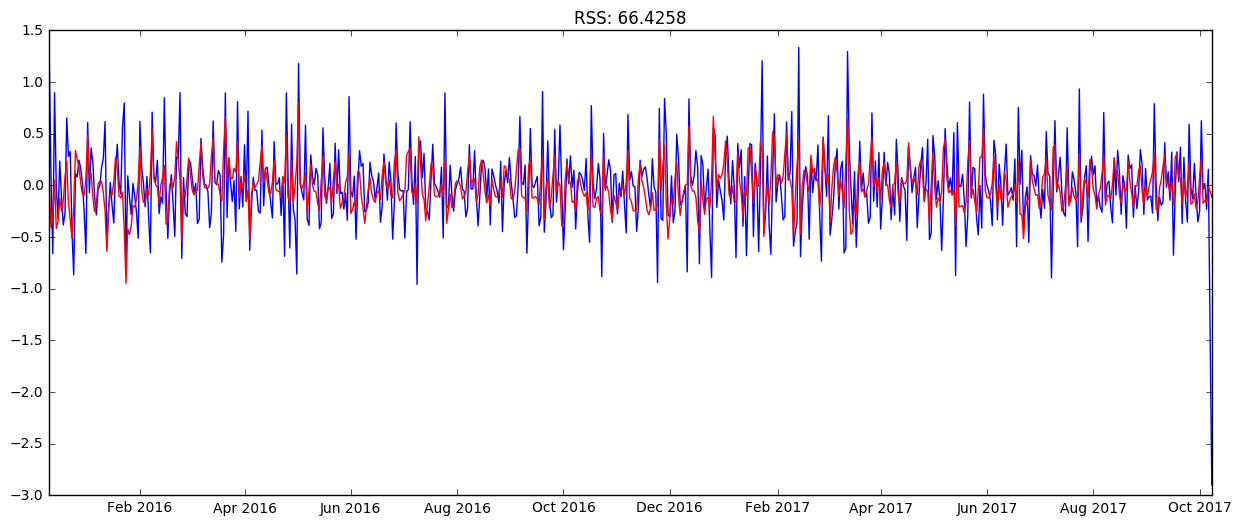

In [308]:
model = ARIMA(interpolated_log_set, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(interpolated_log_diff_set)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-interpolated_log_diff_set)**2))

In [309]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

2015-12-11   -0.000116
2015-12-12   -0.409466
2015-12-13   -0.329948
2015-12-14    0.050753
2015-12-15   -0.415935
dtype: float64


In [310]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2015-12-11   -0.000116
2015-12-12   -0.409582
2015-12-13   -0.739530
2015-12-14   -0.688777
2015-12-15   -1.104712
dtype: float64


In [311]:
predictions_ARIMA_log = pd.Series(interpolated_log.ix[0], index=interpolated_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

2015-12-10    3.713572
2015-12-11    3.713456
2015-12-12    3.303990
2015-12-13    2.974042
2015-12-14    3.024795
2015-12-15    2.608860
2015-12-16    2.261503
2015-12-17    2.136474
2015-12-18    1.891128
2015-12-19    1.736711
2015-12-20    1.820692
2015-12-21    2.058959
2015-12-22    1.885835
2015-12-23    1.554575
2015-12-24    1.044966
2015-12-25    0.835326
2015-12-26    1.174772
2015-12-27    1.423739
2015-12-28    1.608818
2015-12-29    1.630499
2015-12-30    1.545262
2015-12-31    1.450019
2016-01-01    1.519082
2016-01-02    2.003421
2016-01-03    2.079194
2016-01-04    2.197013
2016-01-05    2.077595
2016-01-06    1.824553
2016-01-07    1.651805
2016-01-08    1.668946
                ...   
2017-09-09   -4.421185
2017-09-10   -4.235545
2017-09-11   -3.941094
2017-09-12   -3.927300
2017-09-13   -3.902323
2017-09-14   -3.967864
2017-09-15   -3.937268
2017-09-16   -4.125517
2017-09-17   -3.856629
2017-09-18   -3.546169
2017-09-19   -3.456584
2017-09-20   -3.391837
2017-09-21 

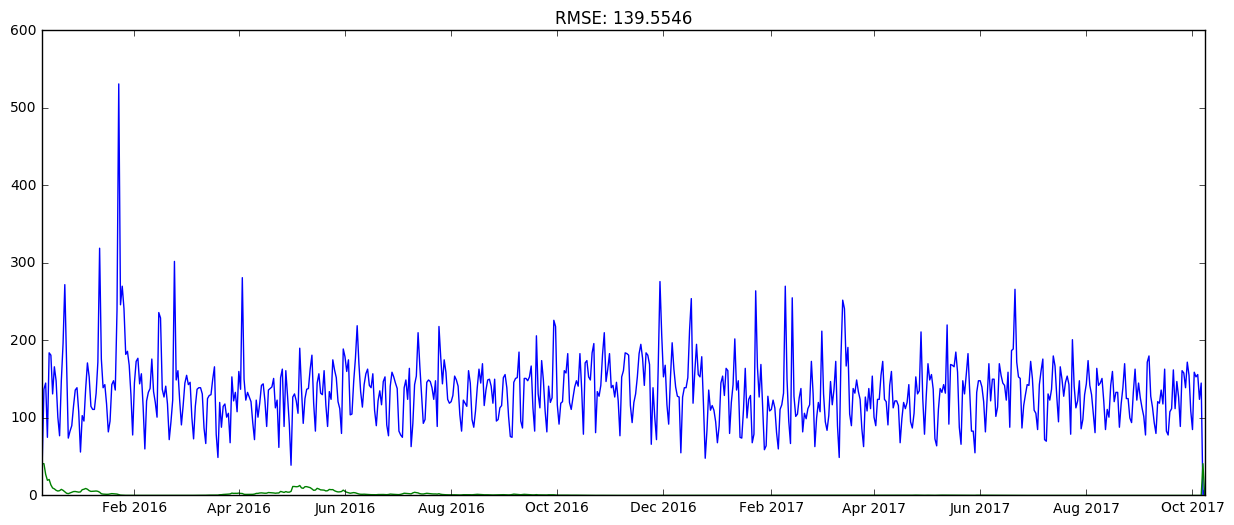

In [315]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA
plt.plot(interpolated_train)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-interpolated_train)**2)/len(interpolated_train)))

In [316]:
predictions_ARIMA

2015-12-10    41.000000
2015-12-11    40.995253
2015-12-12    27.221035
2015-12-13    19.570873
2015-12-14    20.589787
2015-12-15    13.583553
2015-12-16     9.597506
2015-12-17     8.469521
2015-12-18     6.626837
2015-12-19     5.678637
2015-12-20     6.176128
2015-12-21     7.837807
2015-12-22     6.591856
2015-12-23     4.733076
2015-12-24     2.843301
2015-12-25     2.305565
2015-12-26     3.237405
2015-12-27     4.152618
2015-12-28     4.996903
2015-12-29     5.106420
2015-12-30     4.689200
2015-12-31     4.263196
2016-01-01     4.568028
2016-01-02     7.414376
2016-01-03     7.998017
2016-01-04     8.998095
2016-01-05     7.985241
2016-01-06     6.200023
2016-01-07     5.216387
2016-01-08     5.306574
                ...    
2017-09-09     0.012020
2017-09-10     0.014472
2017-09-11     0.019427
2017-09-12     0.019697
2017-09-13     0.020195
2017-09-14     0.018914
2017-09-15     0.019501
2017-09-16     0.016155
2017-09-17     0.021139
2017-09-18     0.028835
2017-09-19     0

In [317]:
predictions = list()

In [318]:
from sklearn.metrics import mean_squared_error
history = [x for x in interpolated_train.values]
predictions = list()
for t in range(len(interpolated_test.values)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = interpolated_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=84.584973, expected=216.000000
predicted=158.663208, expected=134.000000
predicted=130.303161, expected=150.000000
predicted=135.858217, expected=138.000000
predicted=131.751262, expected=109.000000
predicted=121.647739, expected=110.000000
predicted=121.890553, expected=70.000000
predicted=107.796265, expected=150.000000
predicted=135.497038, expected=147.000000
predicted=134.570320, expected=144.000000
predicted=133.586568, expected=159.000000
predicted=138.872741, expected=168.000000
predicted=142.154483, expected=100.000000
predicted=118.577624, expected=93.000000
predicted=115.966535, expected=107.000000
predicted=120.693284, expected=227.000000
predicted=162.309593, expected=143.000000
predicted=133.543685, expected=150.000000
predicted=135.971111, expected=148.000000
predicted=135.359304, expected=105.000000
predicted=120.554299, expected=175.000000
predicted=144.569627, expected=196.000000
predicted=152.124672, expected=141.000000
predicted=133.328926, expected=147.00

C:\Users\Maha\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=138.174295, expected=249.000000
predicted=178.959409, expected=119.000000
predicted=131.803623, expected=113.000000
predicted=129.644464, expected=134.000000
predicted=136.697470, expected=151.000000
predicted=142.474352, expected=121.000000
predicted=132.338239, expected=156.000000
predicted=144.143366, expected=100.000000
predicted=125.252212, expected=88.000000
predicted=121.001708, expected=143.000000
predicted=139.499966, expected=130.000000
predicted=135.137548, expected=128.000000
predicted=134.430945, expected=126.000000
predicted=133.723644, expected=1328.000000
predicted=530.071147, expected=417.000000
predicted=233.404180, expected=132.000000
predicted=154.532582, expected=187.000000
predicted=169.942106, expected=182.000000
predicted=169.088071, expected=586.000000
predicted=288.619971, expected=213.000000
predicted=191.373872, expected=174.000000
predicted=180.946291, expected=145.000000
predicted=171.949045, expected=98.000000
predicted=156.755073, expected=109.

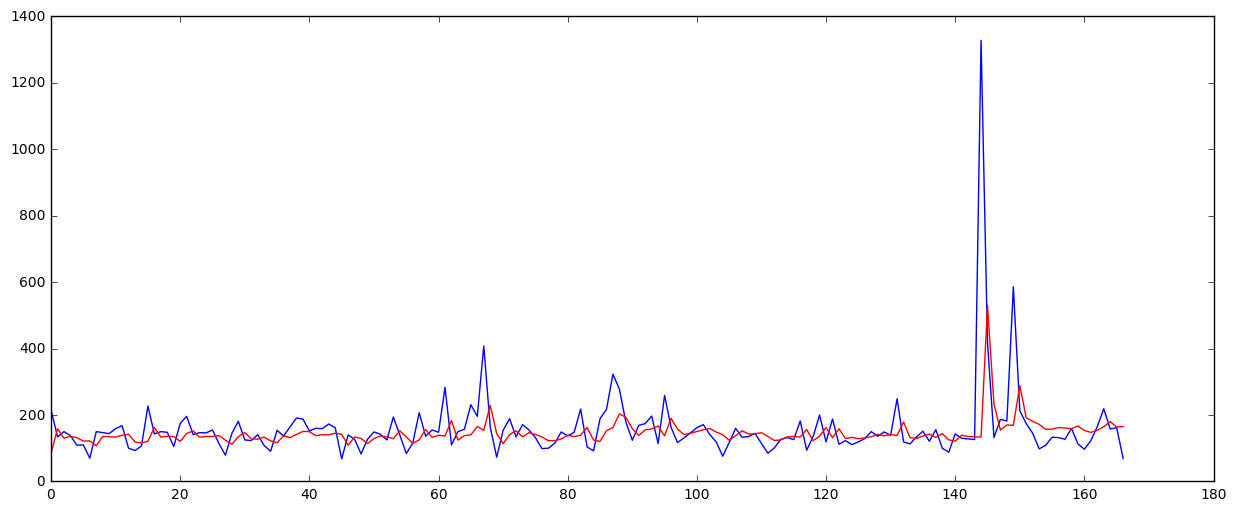

In [232]:
# plot
plt.plot(interpolated_test.values)
plt.plot(predictions,color='red')



In [233]:
error = math.sqrt(mean_squared_error(interpolated_test.values, predictions))

In [234]:
error

109.29205239166038

In [235]:
from sklearn.metrics import mean_squared_error
history = [x for x in interpolated_train.values]
predictions = list()
for t in range(len(interpolated_train.values)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = interpolated_train[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=84.584973, expected=41.000000
predicted=95.760946, expected=137.000000
predicted=130.751202, expected=145.000000
predicted=133.740360, expected=75.000000
predicted=108.275295, expected=184.000000
predicted=147.565812, expected=181.000000
predicted=146.825362, expected=131.000000
predicted=128.874009, expected=166.000000
predicted=141.524966, expected=148.000000
predicted=135.161186, expected=101.000000
predicted=118.195825, expected=77.000000
predicted=109.334756, expected=148.000000
predicted=134.837676, expected=196.000000
predicted=152.340325, expected=272.000000
predicted=181.072268, expected=176.000000
predicted=146.222008, expected=74.000000
predicted=108.935954, expected=83.000000
predicted=111.911313, expected=90.000000
predicted=114.274438, expected=115.000000
predicted=123.306812, expected=136.000000
predicted=130.970305, expected=139.000000
predicted=132.112904, expected=108.000000
predicted=120.758689, expected=56.000000
predicted=101.503874, expected=103.000000
p

C:\Users\Maha\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=111.520547, expected=189.000000
predicted=153.276983, expected=179.000000
predicted=149.693270, expected=160.000000
predicted=142.528156, expected=175.000000
predicted=148.392018, expected=104.000000
predicted=121.198596, expected=105.000000
predicted=121.459423, expected=147.000000
predicted=137.516054, expected=177.000000
predicted=149.109359, expected=219.000000
predicted=165.550581, expected=170.000000
predicted=146.898968, expected=134.000000
predicted=133.079342, expected=114.000000
predicted=125.343833, expected=143.000000
predicted=136.474398, expected=157.000000
predicted=141.922153, expected=163.000000
predicted=144.313957, expected=142.000000
predicted=136.288970, expected=139.000000
predicted=135.143840, expected=157.000000
predicted=142.113841, expected=110.000000
predicted=124.040204, expected=90.000000
predicted=116.183160, expected=122.000000
predicted=128.446205, expected=135.000000
predicted=133.445708, expected=117.000000
predicted=126.507352, expected=147.

C:\Users\Maha\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=136.959981, expected=139.000000
predicted=136.972947, expected=152.000000
predicted=141.922682, expected=213.000000
predicted=165.192171, expected=254.000000
predicted=181.417160, expected=119.000000
predicted=129.918614, expected=159.000000
predicted=145.042440, expected=195.000000
predicted=158.831255, expected=156.000000
predicted=144.134058, expected=153.000000
predicted=143.016285, expected=179.000000
predicted=152.979427, expected=117.000000
predicted=129.474211, expected=48.000000
predicted=103.094220, expected=84.000000
predicted=116.533692, expected=136.000000
predicted=136.291509, expected=110.000000
predicted=126.392079, expected=116.000000
predicted=128.606889, expected=110.000000
predicted=126.267256, expected=95.000000
predicted=120.460485, expected=68.000000
predicted=109.972604, expected=90.000000
predicted=118.205351, expected=145.000000
predicted=139.212982, expected=154.000000
predicted=142.704260, expected=129.000000
predicted=133.167184, expected=164.0000

C:\Users\Maha\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=130.289652, expected=113.000000
predicted=126.480106, expected=81.000000
predicted=114.300771, expected=60.000000
predicted=106.116185, expected=111.000000
predicted=125.317782, expected=117.000000
predicted=127.558084, expected=132.000000
predicted=133.226318, expected=270.000000
predicted=185.628913, expected=150.000000
predicted=140.385135, expected=96.000000
predicted=119.992818, expected=67.000000
predicted=108.891324, expected=255.000000
predicted=179.264046, expected=128.000000
predicted=132.177865, expected=102.000000
predicted=122.495904, expected=105.000000
predicted=123.511908, expected=126.000000
predicted=131.225136, expected=138.000000
predicted=135.665543, expected=82.000000
predicted=114.898652, expected=106.000000
predicted=123.664493, expected=99.000000
predicted=121.003561, expected=112.000000
predicted=125.743054, expected=117.000000
predicted=127.550939, expected=173.000000
predicted=148.298376, expected=131.000000
predicted=132.822638, expected=63.000000

C:\Users\Maha\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=139.170188, expected=128.000000
predicted=131.094735, expected=146.000000
predicted=137.704587, expected=154.000000
predicted=140.680982, expected=143.000000
predicted=136.674459, expected=79.000000
predicted=113.138683, expected=201.000000
predicted=157.766483, expected=141.000000
predicted=135.973052, expected=113.000000
predicted=125.729121, expected=122.000000
predicted=128.976635, expected=148.000000
predicted=138.445322, expected=86.000000
predicted=115.848835, expected=98.000000
predicted=120.110747, expected=130.000000
predicted=131.734280, expected=144.000000
predicted=136.851729, expected=174.000000
predicted=147.839250, expected=142.000000
predicted=136.244202, expected=130.000000
predicted=131.857626, expected=105.000000
predicted=122.714665, expected=81.000000
predicted=113.858850, expected=164.000000
predicted=144.069184, expected=142.000000
predicted=136.130372, expected=145.000000
predicted=137.235559, expected=151.000000
predicted=139.447243, expected=122.000

C:\Users\Maha\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=125.595018, expected=94.000000
predicted=118.270805, expected=80.000000
predicted=113.063963, expected=121.000000
predicted=127.903273, expected=119.000000
predicted=127.163725, expected=136.000000
predicted=133.327880, expected=118.000000
predicted=126.777099, expected=163.000000
predicted=143.134287, expected=83.000000
predicted=114.117477, expected=78.000000
predicted=112.140439, expected=108.000000
predicted=122.955532, expected=112.000000
predicted=124.360778, expected=162.000000
predicted=142.528872, expected=112.000000
predicted=124.408846, expected=147.000000
predicted=137.076306, expected=127.000000
predicted=129.847279, expected=89.000000
predicted=116.022962, expected=161.000000
predicted=142.068685, expected=158.000000
predicted=141.058002, expected=139.000000
predicted=134.213361, expected=172.000000
predicted=146.195095, expected=155.000000
predicted=140.114240, expected=109.000000
predicted=123.461927, expected=85.000000
predicted=114.682389, expected=159.00000

In [237]:
error = math.sqrt(mean_squared_error(interpolated_train.values, predictions))
error

40.29242917777994